In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('merged-df.csv')

df.head(10)

,transaction_id,date,user_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_card_brand,card_card_type,card_has_chip,card_cvv,card_expires,card_num_cards_issued,card_credit_limit,card_acct_open_date,card_year_pin_last_changed,card_card_on_dark_web
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523,...,Mastercard,Debit (Prepaid),YES,306,2022-07-01,2,55.0,2008-05-01,2008,No
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722,...,Mastercard,Credit,YES,438,2024-12-01,1,9100.0,2005-09-01,2015,No
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084,...,Mastercard,Debit,YES,256,2020-05-01,1,14802.0,2006-01-01,2008,No
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307,...,Mastercard,Debit,NO,54,2024-10-01,2,37634.0,2004-05-01,2006,No
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776,...,Visa,Debit,YES,120,2020-01-01,1,19113.0,2009-07-01,2014,No
5,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464,...,Mastercard,Debit (Prepaid),YES,198,2014-03-01,1,89.0,2008-01-01,2015,No
6,7475334,2010-01-01 00:09:00,1556,2972,77.00,Swipe Transaction,59935,Beulah,ND,58523,...,Mastercard,Debit (Prepaid),YES,306,2022-07-01,2,55.0,2008-05-01,2008,No
7,7475335,2010-01-01 00:14:00,1684,2140,26.46,Online Transaction,39021,ONLINE,Unknown,Unknown,...,Mastercard,Debit (Prepaid),YES,513,2021-05-01,1,46.0,2007-03-01,2012,No
8,7475336,2010-01-01 00:21:00,335,5131,261.58,Online Transaction,50292,ONLINE,Unknown,Unknown,...,Visa,Debit,YES,833,2020-06-01,1,23401.0,2008-10-01,2011,No
9,7475337,2010-01-01 00:21:00,351,1112,10.74,Swipe Transaction,3864,Flushing,NY,11355,...,Mastercard,Debit (Prepaid),YES,893,2023-11-01,2,54.0,2007-02-01,2010,No


In [2]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['day_of_week'] = df['date'].dt.dayofweek

df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df = df.drop(columns=['day_of_week'])
weekend_count = df['is_weekend'].sum()

print(weekend_count)

3801414


In [3]:
df.head(10)

,transaction_id,date,user_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_card_type,card_has_chip,card_cvv,card_expires,card_num_cards_issued,card_credit_limit,card_acct_open_date,card_year_pin_last_changed,card_card_on_dark_web,is_weekend
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523,...,Debit (Prepaid),YES,306,2022-07-01,2,55.0,2008-05-01,2008,No,0
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722,...,Credit,YES,438,2024-12-01,1,9100.0,2005-09-01,2015,No,0
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084,...,Debit,YES,256,2020-05-01,1,14802.0,2006-01-01,2008,No,0
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307,...,Debit,NO,54,2024-10-01,2,37634.0,2004-05-01,2006,No,0
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776,...,Debit,YES,120,2020-01-01,1,19113.0,2009-07-01,2014,No,0
5,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464,...,Debit (Prepaid),YES,198,2014-03-01,1,89.0,2008-01-01,2015,No,0
6,7475334,2010-01-01 00:09:00,1556,2972,77.00,Swipe Transaction,59935,Beulah,ND,58523,...,Debit (Prepaid),YES,306,2022-07-01,2,55.0,2008-05-01,2008,No,0
7,7475335,2010-01-01 00:14:00,1684,2140,26.46,Online Transaction,39021,ONLINE,Unknown,Unknown,...,Debit (Prepaid),YES,513,2021-05-01,1,46.0,2007-03-01,2012,No,0
8,7475336,2010-01-01 00:21:00,335,5131,261.58,Online Transaction,50292,ONLINE,Unknown,Unknown,...,Debit,YES,833,2020-06-01,1,23401.0,2008-10-01,2011,No,0
9,7475337,2010-01-01 00:21:00,351,1112,10.74,Swipe Transaction,3864,Flushing,NY,11355,...,Debit (Prepaid),YES,893,2023-11-01,2,54.0,2007-02-01,2010,No,0


In [4]:
df['amount_type'] = df['amount'].apply(lambda x: 'in' if x > 0 else 'out')

print(df[['amount', 'amount_type']].head())

   amount amount_type
0  -77.00         out
1   14.57          in
2   80.00          in
3  200.00          in
4   46.41          in


In [6]:
avg_amount = df.groupby(['is_weekend', 'amount_type'])['amount'].mean().unstack()

print(avg_amount)

amount_type         in         out
is_weekend                        
0            50.549813 -100.530521
1            50.728800 -101.024727


In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['year'] = df['date'].dt.year

avg_amount_by_year = df.groupby(['year', 'amount_type'])['amount'].mean().unstack()

print(avg_amount_by_year)

amount_type         in         out
year                              
2010         51.729254 -101.230808
2011         51.023769 -100.443345
2012         50.682133 -100.261114
2013         50.751032 -100.933985
2014         50.450206 -100.189859
2015         50.422116 -101.115177
2016         50.529082 -100.550449
2017         50.169312 -100.498094
2018         50.162025 -100.436286
2019         50.186762 -101.142710


I try year and is_weekend, but strangely amount doeesn't differ in these situation

In [9]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df = df.sort_values(['user_id', 'date']).reset_index(drop=True)

def calc_txn_freq_7d(group):
    group = group.set_index('date')
    freq = group['user_id'].rolling('7d', closed='left').count()
    group['transaction_frequency_7d'] = freq.values
    return group.reset_index()

df = df.groupby('user_id', group_keys=False).apply(calc_txn_freq_7d).reset_index(drop=True)

print(df[['user_id', 'date', 'transaction_frequency_7d']].head(10))

/var/tmp/ipykernel_4758/1023329444.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('user_id', group_keys=False).apply(calc_txn_freq_7d).reset_index(drop=True)


   user_id                date  transaction_frequency_7d
0        0 2010-01-01 13:10:00                       NaN
1        0 2010-01-01 19:39:00                       1.0
2        0 2010-01-01 22:13:00                       2.0
3        0 2010-01-02 13:08:00                       3.0
4        0 2010-01-03 15:44:00                       4.0
5        0 2010-01-03 21:52:00                       5.0
6        0 2010-01-04 08:49:00                       6.0
7        0 2010-01-04 13:03:00                       7.0
8        0 2010-01-04 13:19:00                       8.0
9        0 2010-01-04 14:39:00                       9.0


In [11]:
print(df[['transaction_frequency_7d', 'amount']].describe())

corr = df[['transaction_frequency_7d', 'amount']].corr()
print(corr)

       transaction_frequency_7d        amount
count              1.330426e+07  1.330592e+07
mean               2.734603e+01  4.297604e+01
std                1.496111e+01  8.165575e+01
min                1.000000e+00 -5.000000e+02
25%                1.700000e+01  8.930000e+00
50%                2.400000e+01  2.899000e+01
75%                3.400000e+01  6.371000e+01
max                1.330000e+02  6.820200e+03
                          transaction_frequency_7d    amount
transaction_frequency_7d                  1.000000 -0.026194
amount                                   -0.026194  1.000000


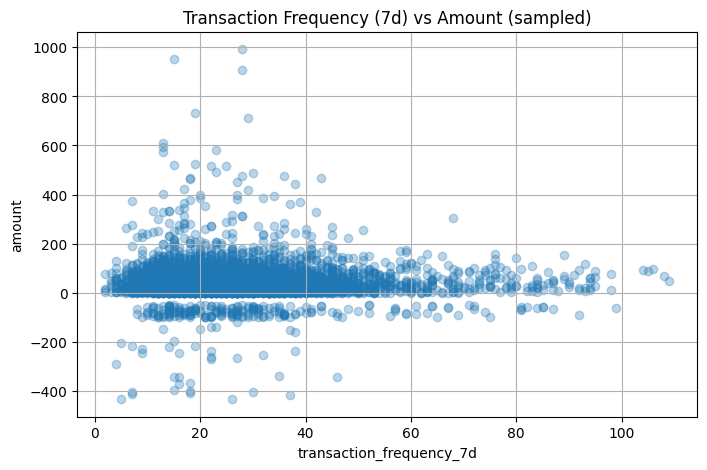

In [13]:
import matplotlib.pyplot as plt

sample_df = df.sample(n=5000, random_state=42)

plt.figure(figsize=(8,5))
plt.scatter(sample_df['transaction_frequency_7d'], sample_df['amount'], alpha=0.3)
plt.title('Transaction Frequency (7d) vs Amount (sampled)')
plt.xlabel('transaction_frequency_7d')
plt.ylabel('amount')
plt.grid(True)
plt.show()


<Figure size 800x500 with 0 Axes>

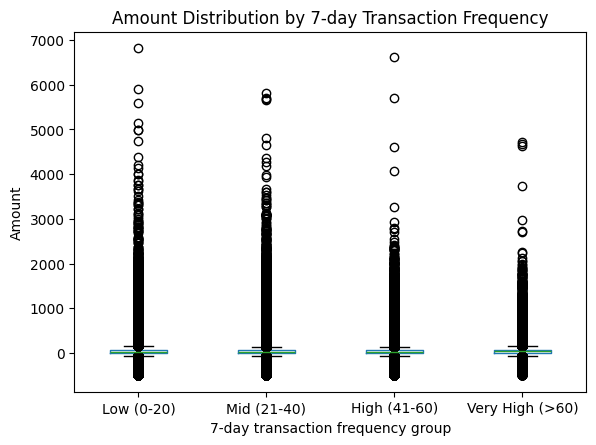

In [14]:
df['freq_bin'] = pd.cut(df['transaction_frequency_7d'],
                        bins=[0,20,40,60,200],
                        labels=['Low (0-20)','Mid (21-40)','High (41-60)','Very High (>60)'])

plt.figure(figsize=(8,5))
df.boxplot(column='amount', by='freq_bin', grid=False)
plt.title('Amount Distribution by 7-day Transaction Frequency')
plt.suptitle('')
plt.xlabel('7-day transaction frequency group')
plt.ylabel('Amount')
plt.show()


In [ ]:
import seaborn as sns
num_cols = ['user_current_age', 'user_yearly_income', 'user_credit_score',
             'user_total_debt','transaction_frequency_7d' ]

plt.figure(figsize=(10,8))
sns.heatmap(all_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()